In [1]:
import copy
import operator
import sre_parse
import sre_constants
from functools import reduce
from random import Random
from importlib import reload
from dataclasses import asdict
from typing import Tuple
from collections import defaultdict, Counter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import Path as MarkerPath
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import seaborn as sns
from ipywidgets import Accordion, HTML, VBox, HBox, Output, Button, Layout, Dropdown, Tab, Widget, GridBox, Text
from ipywidgets import Label, GridspecLayout
from tqdm import tqdm

In [3]:
import constants
reload(constants)
import solver
reload(solver)

<module 'solver' from '/data/Development/regex_crossword/solver.py'>

In [4]:
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 400)
pd.set_option('display.max_colwidth', 400)

In [5]:
solutions = solver.Solver.solve()
solutions

init solutions: 100%|██████████| 39/39 [00:01<00:00, 35.45it/s]
process 1 sz=6.4e+10 all=[] pts=[19 dims] ixs=[17 dims]:   5%|▌         | 1/20 [00:00<00:02,  6.90it/s]                                              

init ci sz=1.2e+21 all=[] pts=[z2(7): 4, x10(7): 3, x11(15): 4, x2(5): 0, y7(27): 16] ixs=[31 dims]


process 6 sz=8 all=[] pts=[34 dims] ixs=[x9(89): 2, y1(45): 4]:  30%|███       | 6/20 [00:00<00:01,  8.88it/s]             
expand sz=1 all=[] pts=[x9(89): 44, y1(45): 31] ixs=[]: 100%|██████████| 8/8 [00:00<00:00, 1374.39it/s]

iter ci sz=8 all=[] pts=[34 dims] ixs=[x9(89): 2, y1(45): 4]
pt sz=1 all=[] pts=[34 dims] ixs=[]
pt sol <Solution n=126>
ix dims sz=8 all=[] pts=[] ixs=[x9(89): 2, y1(45): 4]
final_solutions frozenset({<Solution n=127>, <Solution n=127>, <Solution n=127>, <Solution n=127>})


frozenset({<Solution n=127>,
           <Solution n=127>,
           <Solution n=127>,
           <Solution n=127>})

In [6]:
solution_df = pd.DataFrame([s.cells for s in solutions]).T.sort_index()
solution_df

,0,1,2,3
"(0, 0)",G,G,G,G
"(0, 1)",C,C,C,C
"(0, 2)",C,C,C,C
"(0, 3)",H,H,H,H
"(0, 4)",H,H,H,H
...,...,...,...,...
"(12, 2)",P,P,P,P
"(12, 3)",E,E,E,E
"(12, 4)",H,H,H,H
"(12, 5)",A,A,A,A


In [7]:
solution_df[solution_df.T.nunique() != 1]

,0,1,2,3
"(1, 1)",R,D,D,R
"(1, 4)",M,D,M,D
"(2, 5)","E : 5,2, 5,5","[^MCE] : 5,2, 5,5","E : 5,2, 5,5","[^MCE] : 5,2, 5,5"


In [11]:
[solution[2,5] for solution in solutions]

[<CompoundConstraint E : 5,2, 5,5>,
 <CompoundConstraint [^MCE] : 5,2, 5,5>,
 <CompoundConstraint E : 5,2, 5,5>,
 <CompoundConstraint [^MCE] : 5,2, 5,5>]

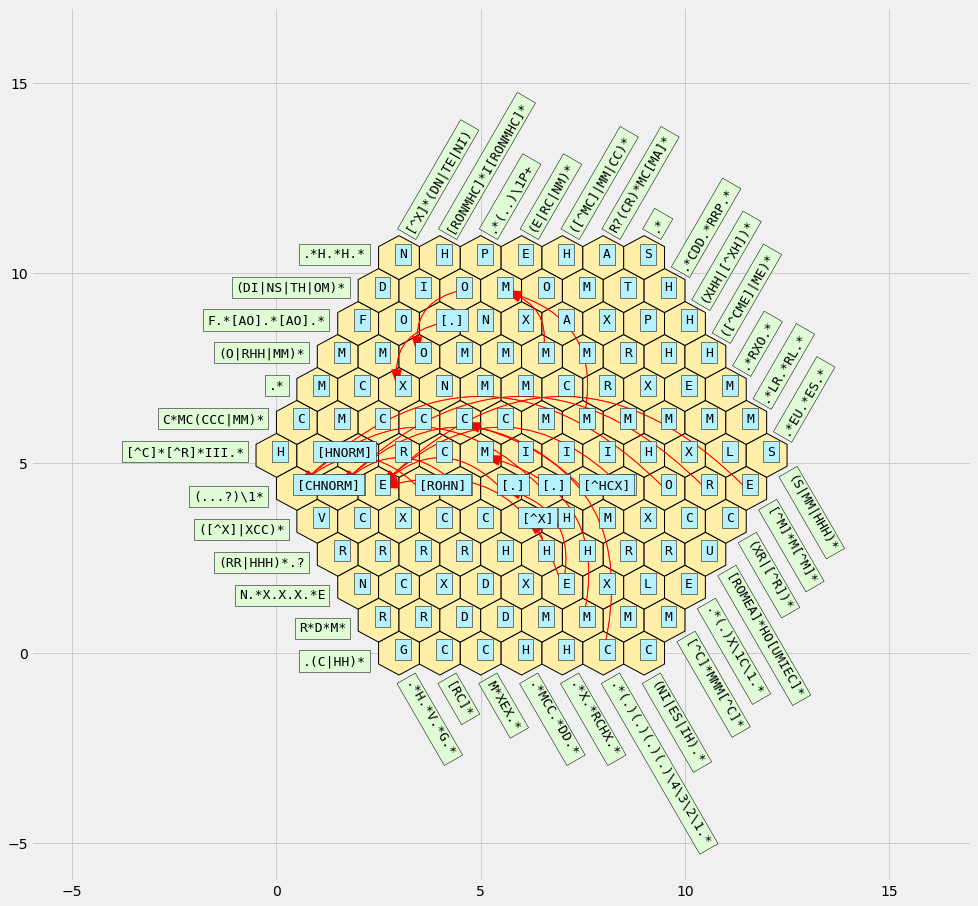

In [12]:
drawer = solver.draw_puzzle(fig_size=15, solution=next(iter(solutions)))